In [1]:
import numpy as np
from  netCDF4 import Dataset
import matplotlib.pyplot as plt

import time
#%matplotlib inline

In [2]:
PATHbase="/mnt/web2/TsunamiSurge/JETS_System/JRC/"

In [3]:
data0=Dataset(PATHbase+str(15610)+'/NETCDF_H.nc')

RuntimeError: No such file or directory

In [4]:
nformat=data0.data_model

In [25]:
ha0=data0.variables['HA'][:-1,:-1,:-1]
lon=data0.variables['LON'][:-1]
lat=data0.variables['LAT'][:-1]
t=data0.variables['TIME'][:-1]

latc=np.mean(lat)
lonc=np.mean(lon)

lons, lats = np.meshgrid(lon,lat)


In [6]:
s=ha0.shape

In [7]:
s

(240, 509, 1379)

In [8]:
s[1:]

(509, 1379)

In [8]:
ens={}

In [9]:
ens['nominal']=ha0[:,:,:]

In [10]:
for f in range(2,4):
    data=Dataset(PATHbase+str(15610)+ '/%03i/coarse/NETCDF_H.nc' %(f))
    print f
    ha=data.variables['HA']
    print ha.shape
#    lon=data.variables['LON']
#    lat=data.variables['LAT']
#    t=data.variables['TIME']
    if ha.shape[1:]==s[1:] :
             ens['r'+str(f)]=ha[:,:,:]
    data.close()        


2
(251, 628, 1120)
3
(250, 628, 1120)


In [8]:
tt = {k:np.shape(v)[0] for k,v in ens.items()}

NameError: name 'ens' is not defined

In [9]:
tm=np.min(tt.values())


NameError: name 'tt' is not defined

In [15]:
ss

array([ 250,  628, 1120])

In [14]:
ss=np.append(tm,s[1:])
#w=np.zeros(ss)
wmin=ha0[:ss[0],:,:]
wmax=ha0[:ss[0],:,:]
for k,v in ens.items():
     w = w+v[:ss[0],:,:] 
     c=wmin>v[:ss[0],:,:]
     print np.sum(c) 
     wmin[c]=v[:ss[0],:,:][c]
     c=wmax<v[:ss[0],:,:]
     print np.sum(c) 
     wmax[c]=v[:ss[0],:,:][c]

    

MemoryError: 

In [8]:
tm=200

In [9]:
tstart = time.time()

In [23]:
import copy

In [25]:
wmin=copy.deepcopy(ha0)
wmax=copy.deepcopy(ha0)
#ss=np.append(tm,s[1:])
w=ha0

In [31]:
ni=6

In [32]:
for f in range(1,ni):
    data=Dataset(PATHbase+str(15610)+ '/%03i/coarse/NETCDF_H.nc' %(f))
    print f
    ha=data.variables['HA'][:-1,:-1,:-1]
    print ha.shape
#    lon=data.variables['LON']
#    lat=data.variables['LAT']
#    t=data.variables['TIME']
    c=wmin>ha
    print np.sum(c) 
    wmin[c]=ha[c]
    c=wmax<ha
    print np.sum(c) 
    wmax[c]=ha[c]

    w=w+ha
    #data.close()        


1


MemoryError: 

In [30]:
ha.max()

1.6130793

In [27]:
wmin.all()==wmax.all()

True

In [22]:
print time.time() - tstart

1874.43783212


In [26]:
import os
import shutil

In [27]:

for f in range(11,ni):
    ifile=PATHbase+str(15610)+ '/%03i/coarse/NETCDF_H.nc' %(f)
    shutil.copy(ifile, '/home/critechuser/brey/NETCDF_TEST/15610/f{}.nc'.format(f))

In [23]:
1874/60.

31.233333333333334

In [17]:
wmin.max(),wmin.min()

(1.6130793, -1.5439506)

In [18]:
wmax.max(),wmax.min()

(1.6130793, -1.5439506)

In [17]:
plt.figure()
plt.plot(wmin[:,320,40],'r-',ha0[:ss[0],320,40],'g-',wmax[:,320,40],'b-',w[:,320,40]/f,'k--')
plt.show()

In [21]:
from mpl_toolkits.basemap import Basemap, shiftgrid
import matplotlib.animation as animation


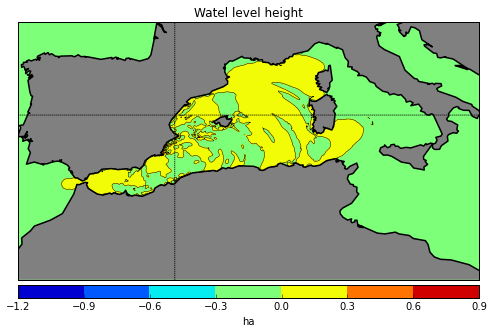

In [28]:

# make orthographic basemap.
m = Basemap(llcrnrlon=lon.min(),llcrnrlat=lat.min(),urcrnrlon=lon.max(),urcrnrlat=lat.max(),
            projection='cyl',lat_1=lat.min(),lat_2=lat.max(),lon_0=lonc,
            resolution ='l',area_thresh=1000.)
# create figure, add axes
fig1 = plt.figure(figsize=(8,10))
ax = fig1.add_axes([0.1,0.1,0.8,0.8])
# set desired contour levels.

# compute native x,y coordinates of grid.
x, y = m(lons, lats)
# define parallels and meridians to draw.
parallels = np.arange(-80.,90,20.)
meridians = np.arange(0.,360.,20.)
m.drawcoastlines(linewidth=1.5)
m.drawparallels(parallels)
m.drawmeridians(meridians)
# set plot title
ax.set_title('Watel level height')

# plot contours.
CS1 = m.contour(x,y,ha[100,:-1,:-1],linewidths=0.5,colors='k',animated=True)
CS2 = m.contourf(x,y,ha[100,:-1,:-1],cmap=plt.cm.jet,animated=True)
# add colorbar
cb = m.colorbar(CS2,"bottom", size="5%", pad="2%")
cb.set_label('ha')
m.fillcontinents(color = 'gray')
        
plt.show()

In [59]:
lon[:-1]

array([ -9.4875    ,  -9.4625    ,  -9.4375    , ...,  18.38750042,
        18.41250042,  18.43750042])

In [50]:
lat[:-1]

array([ 30.01250053,  30.03750053,  30.06250053,  30.08750053,
        30.11250053,  30.13750053,  30.16250053,  30.18750053,
        30.21250053,  30.23750053,  30.26250053,  30.28750053,
        30.31250053,  30.33750053,  30.36250053,  30.38750053,
        30.41250054,  30.43750054,  30.46250054,  30.48750054,
        30.51250054,  30.53750054,  30.56250054,  30.58750054,
        30.61250054,  30.63750054,  30.66250054,  30.68750054,
        30.71250054,  30.73750054,  30.76250054,  30.78750054,
        30.81250054,  30.83750054,  30.86250054,  30.88750054,
        30.91250054,  30.93750054,  30.96250054,  30.98750054,
        31.01250054,  31.03750054,  31.06250054,  31.08750055,
        31.11250055,  31.13750055,  31.16250055,  31.18750055,
        31.21250055,  31.23750055,  31.26250055,  31.28750055,
        31.31250055,  31.33750055,  31.36250055,  31.38750055,
        31.41250055,  31.43750055,  31.46250055,  31.48750055,
        31.51250055,  31.53750055,  31.56250055,  31.58

In [16]:
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print 'x = %d, y = %d'%(
        ix, iy)

    global coords
    coords.append((ix, iy))

#   if len(coords) == 2:
#       fig.canvas.mpl_disconnect(cid)

    return coords



In [20]:
coords=[]
cid = fig1.canvas.mpl_connect('button_press_event', onclick)
print coords

[]


# WRITE to NETCDF file

In [16]:
import os
os.chdir('../../brey/NETCDF_TEST/')
!pwd

/home/critechuser/brey/NETCDF_TEST


In [49]:
wfile = 'output.nc'
ncfile = Dataset(wfile,'w',format=nformat)

#create dimensions
ncfile.createDimension('lat',lat.size)
ncfile.createDimension('lon',lon.size)
ncfile.createDimension('time',t.size)

#define variables
latitude = ncfile.createVariable('LAT','d',('lat',))
longitude = ncfile.createVariable('LON','d',('lon',))
ha = ncfile.createVariable('HA','d',('time','lat','lon'))
hmin = ncfile.createVariable('Hmin','d',('time','lat','lon'))
hmax = ncfile.createVariable('Hmax','d',('time','lat','lon'))
hav = ncfile.createVariable('Have','d',('time','lat','lon'))

longitude[:] = lon
latitude[:] = lat
ha[:] = ha0
time[:] = time
hmin[:]=wmin
hmax[:]=wmax
hav[:]=w

#close ncfile
ncfile.close()


IndexError: size of data array does not conform to slice

In [58]:
from netcdf_io import file_open,file_write, file_close

In [59]:
handle=file_open('output.nc')

In [ ]:
s=file_write(handle,'LAT',lat)
s=file_write(handle,'LON',lon)
s=file_write(handle,'TIME',t)
s=file_write(handle,'HA',ha0[:,:,:])
s=file_write(handle,'Hmin',wmin)
s=file_write(handle,'Hmax',wmax)
s=file_write(handle,'Hav',w)

In [57]:
file_close(handle)

In [61]:
ha0

In [17]:
read=Dataset('output.nc')

In [18]:
read.variables

OrderedDict([(u'LAT', <netCDF4.Variable object at 0x46940e8>), (u'LON', <netCDF4.Variable object at 0x4694180>), (u'TIME', <netCDF4.Variable object at 0x4694218>), (u'HA', <netCDF4.Variable object at 0x46942b0>)])

In [20]:
h0=read.variables['HA']
#hmin=read.variables['Hmin']
#hmax=read.variables['Hmax']
#hav=read.variables['Hav']



In [13]:
plt.figure()
plt.plot(hmin[:,320,400],'r-',label='min')
#plt.plot(h0[:,320,400],'g-',label='baseline')
plt.plot(hmax[:,320,400],'b-',label='max')
#plt.plot(hav[:,320,400]/52.,'k--',label='average')
plt.legend()
plt.show()

In [26]:
h0.shape, ha0.shape

((240, 509, 1379), (240, 509, 1379))

In [35]:
h0[:,:,:].min(), ha0[:,:,:].min()

(-1.5439506, -1.6094993)

In [36]:
h0[:,:,:].max(), ha0[:,:,:].max()

(1.6130793, 1.6657526)

In [15]:
hmin[:,320,400]==hav[:,320,400]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,